<a href="https://colab.research.google.com/github/Soumyajit567/Twitter_Analysis_for_Class_Imbalance/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install tweepy

In [12]:
!pip install textblob

In [14]:
import tweepy
from textblob import TextBlob
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Coronavirus')
for tweets in public_tweets:
    print(tweets.text)
    analysis = TextBlob(tweets.text)
    print(analysis.sentiment)

RT @RBReich: Your reminder that most coronavirus deaths in U.S. since mid-June have been in red states. Right now, nearly three-quarters of…
Sentiment(polarity=0.22142857142857142, subjectivity=0.3589285714285714)
RT @catturd2: AG William Barr ... “Coronavirus Lockdowns Greatest Intrusion on Civil Liberties’ Since Slavery.”

FULLY OPEN UP THE USA NOW…
Sentiment(polarity=0.5, subjectivity=0.75)
RT @HuffPost: Barr said lockdowns are “the greatest intrusion on civil liberties” other than slavery. https://t.co/Sks5AXPFWL
Sentiment(polarity=0.4375, subjectivity=0.6875)
RT @HighnPositive: #रेलअप्रेंटिस_बेरोज़गार
#राष्ट्रीय_बेरोजगारी_दिवस
#राष्ट्रीय_बेरोजगार_दिवस
#NationalUnemploymentDay
#17Baje17Minute 
#CO…
Sentiment(polarity=0.0, subjectivity=0.0)
El tiempo promedio para desarrollar una vacuna es 10 años. La vacuna más rápidamente desarrollada fue de la parotid… https://t.co/j9cscpBGh1
Sentiment(polarity=0.0, subjectivity=0.0)
RT @aasiain: ¿La última gran noticia que llega de EEUU es que l

In [18]:
def get_tweet_sentiment(self, tweet):
   # create TextBlob object of passed tweet text
   analysis = TextBlob(self.trim_tweet(tweet))
   # set sentiment
   if analysis.sentiment.polarity > 0:
      return 'positive'
   elif analysis.sentiment.polarity == 0:
      return 'neutral'
   else:
      return 'negative'
get_tweet_sentiment      


<function __main__.get_tweet_sentiment>

In [19]:
!pip install matplotlib

In [20]:
matplotlib inline

In [21]:

from plotly import __version__
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [25]:
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'

In [26]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [28]:
import tweepy as tw
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
warnings.filterwarnings("ignore")


In [29]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
search_term = "#coronavirus+covid+india -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-06-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['@Vikashagg22 @Vikashagg22 COVID-19 plasma therapy resources for India\n\nIf you are looking to connect with a COVID-1… https://t.co/hdu3RF6ikA',
 'COVID 19 cases in India until : 17/09/2020 20:30\n\nTotal Cases: 5141906 [+26012]😅\nActive: 1017756🖖🏽\nRecovered: 40399… https://t.co/UhOjSXHX04',
 'Delhi Metro Rail Corporation Suffered Loss of Rs 1,609 Crore Due to Closure of Services in View of COVID-19 Pandemi… https://t.co/z0x8P8AT8D',
 'All over the world, inequality has had a devastating effect on people’s lives. This opinion article looks to income… https://t.co/LtB61NbxBh',
 "@timesofindia The numbers suggest India is 2nd most #WuhanVirus affected country in world, whereas Truth is India's… https://t.co/i2L9445u7H"]

In [30]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [31]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Vikashagg22 Vikashagg22 COVID19 plasma therapy resources for IndiaIf you are looking to connect with a COVID1',
 'COVID 19 cases in India until 17092020 2030Total Cases 5141906 26012Active 1017756Recovered 40399',
 'Delhi Metro Rail Corporation Suffered Loss of Rs 1609 Crore Due to Closure of Services in View of COVID19 Pandemi',
 'All over the world inequality has had a devastating effect on peoples lives This opinion article looks to income',
 'timesofindia The numbers suggest India is 2nd most WuhanVirus affected country in world whereas Truth is Indias']

In [32]:
import pandas as pd
# Note how capitalization impacts unique returned values
ex_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Get unique elements in the list
set(ex_list)

{'COVID 19', 'Corona', 'Coronavirus', 'corona', 'coronavirus', 'covid 19'}

In [33]:
# Note how capitalization impacts unique returned values
words_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['coronavirus', 'covid 19', 'coronavirus', 'covid 19', 'corona', 'corona']

**Bag of Words**

In [34]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from google.colab import drive
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [35]:
set(lower_case)

{'corona', 'coronavirus', 'covid 19'}

In [36]:
all_tweets_no_urls[0].split()

['Vikashagg22',
 'Vikashagg22',
 'COVID19',
 'plasma',
 'therapy',
 'resources',
 'for',
 'IndiaIf',
 'you',
 'are',
 'looking',
 'to',
 'connect',
 'with',
 'a',
 'COVID1']

In [37]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['vikashagg22',
  'vikashagg22',
  'covid19',
  'plasma',
  'therapy',
  'resources',
  'for',
  'indiaif',
  'you',
  'are',
  'looking',
  'to',
  'connect',
  'with',
  'a',
  'covid1'],
 ['covid',
  '19',
  'cases',
  'in',
  'india',
  'until',
  '17092020',
  '2030total',
  'cases',
  '5141906',
  '26012active',
  '1017756recovered',
  '40399']]

In [38]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('covid19', 541),
 ('india', 484),
 ('coronavirus', 448),
 ('the', 416),
 ('cases', 407),
 ('in', 399),
 ('of', 366),
 ('to', 299),
 ('covid', 242),
 ('a', 157),
 ('for', 145),
 ('and', 127),
 ('new', 118),
 ('indias', 112),
 ('with', 106)]

In [39]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,covid19,541
1,india,484
2,coronavirus,448
3,the,416
4,cases,407


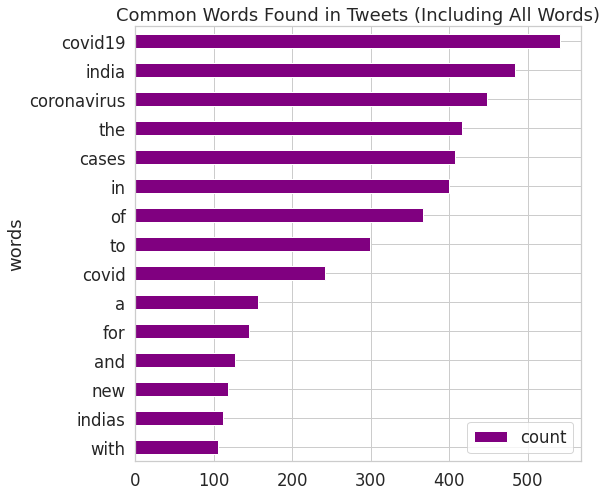

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['be', 's', 'him', 'why', "hasn't", 'down', 'o', 'off', 'this', 'most']

In [43]:
words_in_tweet[0]

['vikashagg22',
 'vikashagg22',
 'covid19',
 'plasma',
 'therapy',
 'resources',
 'for',
 'indiaif',
 'you',
 'are',
 'looking',
 'to',
 'connect',
 'with',
 'a',
 'covid1']

In [44]:
for all_words in words_in_tweet:
    for a_word in all_words:
        # remove stop words
        # Remove stop words from each tweet list of words
     tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['vikashagg22',
 'vikashagg22',
 'covid19',
 'plasma',
 'therapy',
 'resources',
 'indiaif',
 'looking',
 'connect',
 'covid1']

In [45]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('covid19', 541),
 ('india', 484),
 ('coronavirus', 448),
 ('cases', 407),
 ('covid', 242),
 ('new', 118),
 ('indias', 112),
 ('vaccine', 105),
 ('tally', 90),
 ('deaths', 88),
 ('corona', 82),
 ('updates', 78),
 ('lakh', 75),
 ('million', 70),
 ('china', 66)]

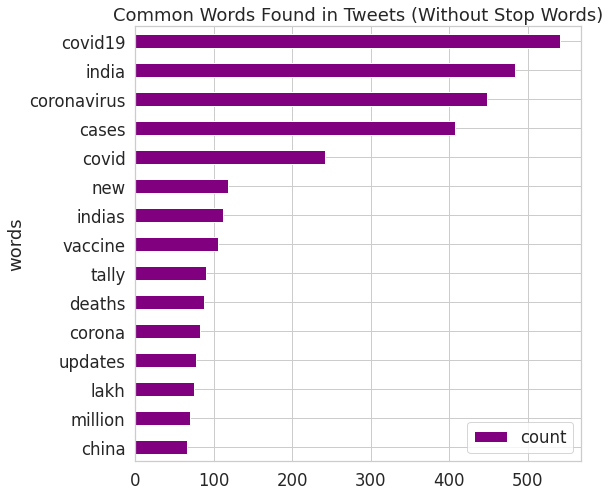

In [46]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [47]:
collection_words = ['covid 19', 'coronavirus', 'india']

In [48]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [49]:
tweets_nsw[0]

['vikashagg22',
 'vikashagg22',
 'covid19',
 'plasma',
 'therapy',
 'resources',
 'indiaif',
 'looking',
 'connect',
 'covid1']

In [50]:
tweets_nsw_nc[0]

['vikashagg22',
 'vikashagg22',
 'covid19',
 'plasma',
 'therapy',
 'resources',
 'indiaif',
 'looking',
 'connect',
 'covid1']

In [52]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('covid19', 541),
 ('cases', 407),
 ('covid', 242),
 ('new', 118),
 ('indias', 112),
 ('vaccine', 105),
 ('tally', 90),
 ('deaths', 88),
 ('corona', 82),
 ('updates', 78),
 ('lakh', 75),
 ('million', 70),
 ('china', 66),
 ('19', 65),
 ('wuhan', 52)]

In [53]:
len(counts_nsw_nc)

3189

In [54]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,covid19,541
1,cases,407
2,covid,242
3,new,118
4,indias,112


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
clean_tweets_ncw.describe()

,count
count,15.000000
mean,146.066667
std,142.632628
min,52.000000
25%,72.500000
50%,88.000000
75%,115.000000
max,541.000000


In [57]:
clean_tweets_ncw.columns=['covid19','cases']

In [58]:
clean_tweets_ncw.head()

,covid19,cases
0,covid19,541
1,cases,407
2,covid,242
3,new,118
4,indias,112


In [59]:
clean_tweets_ncw.shape

(15, 2)

In [60]:
clean_tweets_ncw.columns

Index(['covid19', 'cases'], dtype='object')

In [61]:
clean_tweets_ncw.dtypes

covid19    object
cases       int64
dtype: object

In [62]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [63]:
tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
covid19,object,0,15
cases,int64,0,15


In [64]:
clean_tweets_ncw.drop_duplicates()

,covid19,cases
0,covid19,541
1,cases,407
2,covid,242
3,new,118
4,indias,112
5,vaccine,105
6,tally,90
7,deaths,88
8,corona,82
9,updates,78


In [65]:
clean_tweets_ncw['covid19'].fillna(value=(clean_tweets_ncw['cases'].mean()),inplace=True)

In [66]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [67]:
clean_tweets_ncw=pd.get_dummies(clean_tweets_ncw)

In [68]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine,covid19_wuhan
0,541,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,242,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,112,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
clean_tweets_ncw.isnull().values.any()

clean_tweets_ncw.shape

(15, 16)

In [70]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine,covid19_wuhan
0,541,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,407,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,242,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,118,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,112,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Bag of words **

We’ll define a collection of strings called a corpus. Then we’ll use the CountVectorizer to create vectors from the corpus. 

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

#corpus = all_tweets_no_urls[:5]
corpus = all_tweets_no_urls[:5]

vectorizer = CountVectorizer()
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 1 0 0 1]
 [1 0 1 1 1 1 0 1 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 1 1 0 0 3 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0
  1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 2
  0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0]]
{'vikashagg22': 64, 'covid19': 20, 'plasma': 49, 'therapy': 57, 'resources': 51, 'for': 26, 'indiaif': 32, 'you': 69, 'are': 11, 'looking': 37, 'to': 60, 'connect': 15, 'with': 66, 'covid1': 19, 'covid': 18, '19': 3, 'cases': 13, 'in': 29, 'india': 31, 'until': 62, '1709202

In [90]:
clean_tweets_ncw.all_tweets_no_urls=['covid19','cases']

In [91]:

tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
cases,int64,0,15
covid19_19,uint8,0,2
covid19_cases,uint8,0,2
covid19_china,uint8,0,2
covid19_corona,uint8,0,2
covid19_covid,uint8,0,2
covid19_covid19,uint8,0,2
covid19_deaths,uint8,0,2
covid19_indias,uint8,0,2
covid19_lakh,uint8,0,2


**Handling Imbalanced Dataset**

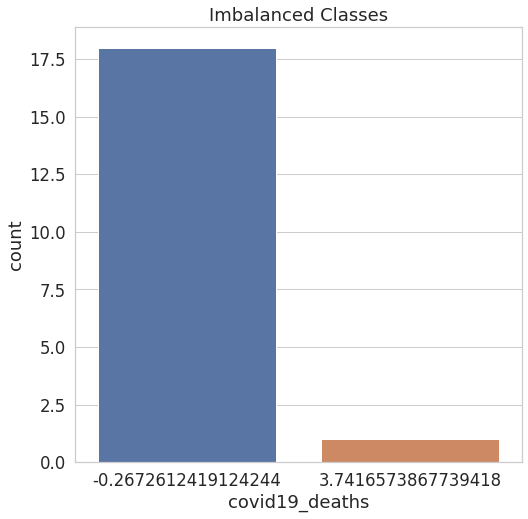

In [404]:



#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('covid19_deaths', data=normalized_df)
plt.title('Imbalanced Classes')
plt.show()

In [309]:
# Using a Pandas dataframe, 'data,' where a column "category" either 
# has the "majority" option or the "minority" option within the column

minority = clean_tweets_ncw[clean_tweets_ncw["cases"] == "minority"]
majority = clean_tweets_ncw[clean_tweets_ncw["cases"] == "majority"].sample(n=len(minority))

In [310]:
# Import the logistic regression package from sci-kit learn
from sklearn.linear_model import LogisticRegression

# Start the instance of the Logistic Regression, but balanced
# Default for class_weight is None, which gives all classes a weight of 1
logreg = LogisticRegression(class_weight='balanced') 

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

In [300]:
import numpy as np
e  = np.array(['coronavirus', 'covid_19'])
print(e)
e.reshape(-1,1)

['coronavirus' 'covid_19']


array([['coronavirus'],
       ['covid_19']], dtype='<U11')

In [313]:
# Import the SMOTE package from the imblearn library
from imblearn.over_sampling import SMOTE



# Start your SMOTE instance
smote = SMOTE()
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Apply SMOTE to your data, some previously defined X and y
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 
oversampler=SMOTE(kind='regular',k_neighbors=2)

# Look at your new, resampled value counts - should be equal!
print(pd.Series(y).value_counts())

b'-0'    12
b'2.'     1
b'0.'     1
b'1.'     1
dtype: int64


**Oversampling using SMOTE**

Counter({0: 9900, 1: 9900})
Counter({0: 9900, 1: 9900})


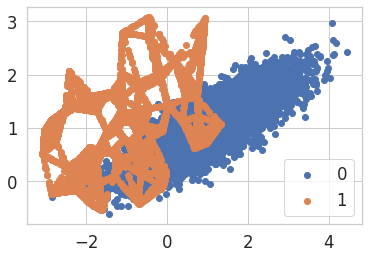

In [374]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**KNN**

In [109]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
clean_tweets_ncw.drop_duplicates()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine,covid19_wuhan
0,2.866068,0,-0.267261,0,0,0,1,-0.267261,0,0,0,-0.267261,0,0,0,0
1,1.893618,0,3.741657,0,0,0,0,-0.267261,0,0,0,-0.267261,0,0,0,0
2,0.696197,0,-0.267261,0,0,1,0,-0.267261,0,0,0,-0.267261,0,0,0,0
3,-0.203682,0,-0.267261,0,0,0,0,-0.267261,0,0,0,3.741657,0,0,0,0
4,-0.247225,0,-0.267261,0,0,0,0,-0.267261,1,0,0,-0.267261,0,0,0,0
5,-0.298025,0,-0.267261,0,0,0,0,-0.267261,0,0,0,-0.267261,0,0,1,0
6,-0.406881,0,-0.267261,0,0,0,0,-0.267261,0,0,0,-0.267261,1,0,0,0
7,-0.421395,0,-0.267261,0,0,0,0,3.741657,0,0,0,-0.267261,0,0,0,0
8,-0.464938,0,-0.267261,0,1,0,0,-0.267261,0,0,0,-0.267261,0,0,0,0
9,-0.493966,0,-0.267261,0,0,0,0,-0.267261,0,0,0,-0.267261,0,1,0,0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['cases', 'covid19_cases', 'covid19_deaths' , 'covid19_new']
#clean_tweets_ncw[columns_to_scale] = standardScaler.fit_transform(clean_tweets_ncw[columns_to_scale])

In [196]:

X = clean_tweets_ncw.iloc[:, :-1].values
#X=np.asarray(clean_tweets_ncw['cases'], dtype="|S6")
y = np.asarray(clean_tweets_ncw['cases'], dtype="|S2")
#y= clean_tweets_ncw.iloc[:, 4].values

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Predictions and Evaluations**

In [198]:
pred =  knn.predict(X_test)

In [199]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[4 0]
 [1 0]]


In [200]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       b'-0'       0.80      1.00      0.89         4
       b'2.'       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



**Choosing a K Value**

Let’s go ahead and use the elbow method to pick a good K Value. We will basically check the error rate for k=1 to say k=40. For every value of k we will call KNN classifier and then choose the value of k which has the least error rate.

In [202]:
error_rate = []
# Might take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Let’s plot a Line graph of the error rate.

Text(0, 0.5, 'Error Rate')

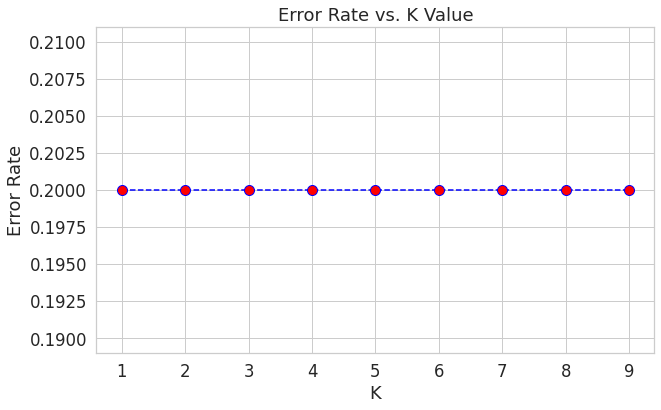

In [375]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [322]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [324]:
data = pd.get_dummies(clean_tweets_ncw)
data.iloc[0]

cases              2.866068
covid19_19         0.000000
covid19_cases     -0.267261
covid19_china      0.000000
covid19_corona     0.000000
covid19_covid      0.000000
covid19_covid19    1.000000
covid19_deaths    -0.267261
covid19_indias     0.000000
covid19_lakh       0.000000
covid19_million    0.000000
covid19_new       -0.267261
covid19_tally      0.000000
covid19_updates    0.000000
covid19_vaccine    0.000000
covid19_wuhan      0.000000
Name: 0, dtype: float64

In [327]:
data.covid19_cases.value_counts()

-0.267261    14
 3.741657     1
Name: covid19_cases, dtype: int64

In [329]:
data = data[~data.cases.isnull()]

**Random Forest**

In [377]:
from sklearn.ensemble import RandomForestClassifier

In [378]:
clf=RandomForestClassifier(random_state=56)

In [379]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [380]:
clf.score(X_train,y_train)

1.0

In [381]:
test_predict=clf.predict(X_test)

In [386]:
from sklearn.metrics import accuracy_score

In [387]:
accuracy_score(test_predict,y_test)

0.9498010407101316

In [391]:
from sklearn.metrics import precision_score, f1_score, classification_report

In [392]:
precision_score(test_predict,y_test)

0.9463459759481961

In [393]:
recall_score(test_predict,y_test)

0.9522184300341296

In [395]:
f1_score(test_predict,y_test)

0.949273120940303

**Naive Bayes**

In [394]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [396]:
gnb = BernoulliNB()

In [397]:
gnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [399]:
test_predict=gnb.predict(X_test)

In [400]:
accuracy_score(test_predict,y_test)

0.8426691153963881

In [401]:
precision_score(test_predict,y_test)

0.8257786000616713

In [402]:
recall_score(test_predict,y_test)

0.8525947150588984

In [403]:
f1_score(test_predict,y_test)

0.8389724310776941